In [3]:
import webbrowser

webbrowser.open("https://pramila15.github.io/vaccine-analysis.github.io/index.html")

True

In [4]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [5]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

In [6]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [7]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [8]:
df.drop(['dateChecked'],axis=1,inplace=True)

In [9]:
df['state']=df['state'].apply(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 55 columns):
date                           20780 non-null datetime64[ns]
state                          20780 non-null object
positive                       20592 non-null float64
probableCases                  9271 non-null float64
negative                       13276 non-null float64
pending                        2139 non-null float64
totalTestResultsSource         20780 non-null object
totalTestResults               20614 non-null float64
hospitalizedCurrently          17339 non-null float64
hospitalizedCumulative         12404 non-null float64
inIcuCurrently                 11636 non-null float64
inIcuCumulative                3792 non-null float64
onVentilatorCurrently          9126 non-null float64
onVentilatorCumulative         1293 non-null float64
recovered                      12003 non-null float64
lastUpdateEt                   20164 non-null object
dateModified                

In [11]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


In [12]:
df.fillna(value=-1, inplace=True)

In [13]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-03-07,AK,56886.0,-1.0,-1.0,-1.0,totalTestsViral,1731628.0,33.0,1293.0,...,-1.0,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,-1.0
1,2021-03-07,AL,499819.0,107742.0,1931711.0,-1.0,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,-1.0,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,-1.0
2,2021-03-07,AR,324818.0,69092.0,2480716.0,-1.0,totalTestsViral,2736442.0,335.0,14926.0,...,-1.0,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,-1.0
3,2021-03-07,AS,0.0,-1.0,2140.0,-1.0,totalTestsViral,2140.0,-1.0,-1.0,...,-1.0,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,-1.0
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,-1.0,totalTestsViral,7908105.0,963.0,57907.0,...,-1.0,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,-1.0


In [14]:
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

c:\users\pramila dalavai\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


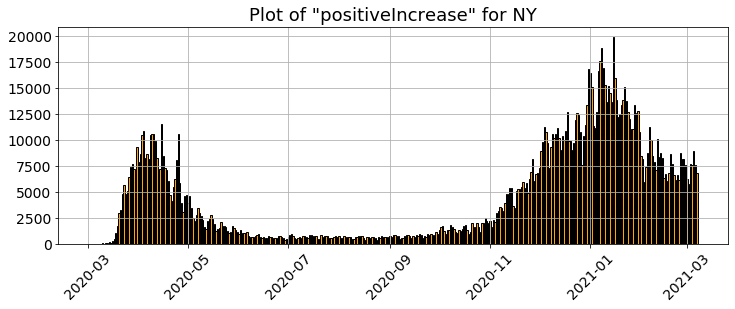

In [15]:
plot_var()